https://medium.com/@axel.em.casas/your-first-machine-learning-project-6caf6b82b908

In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import os
import urllib.request
import tarfile

In [380]:
root="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
path=os.path.join('datasets', 'housing')
url=root+'datasets/housing/housing.tgz'

def get_data(url, path):
  if not os.path.isdir(path):
    os.makedirs(path)

  tgz_path = os.path.join(path, 'housing.tgz')

  urllib.request.urlretrieve(url, tgz_path)

  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=path)
  housing_tgz.close()


get_data(url, path)

def load_data(path):
  csv_path = os.path.join(path, 'housing.csv')
  return pd.read_csv(csv_path)

df=load_data(path=path)

In [381]:
df.head(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


In [382]:
df.shape

(20640, 10)

In [383]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [384]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df["total_bedrooms"].median())

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [386]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [387]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])

In [388]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

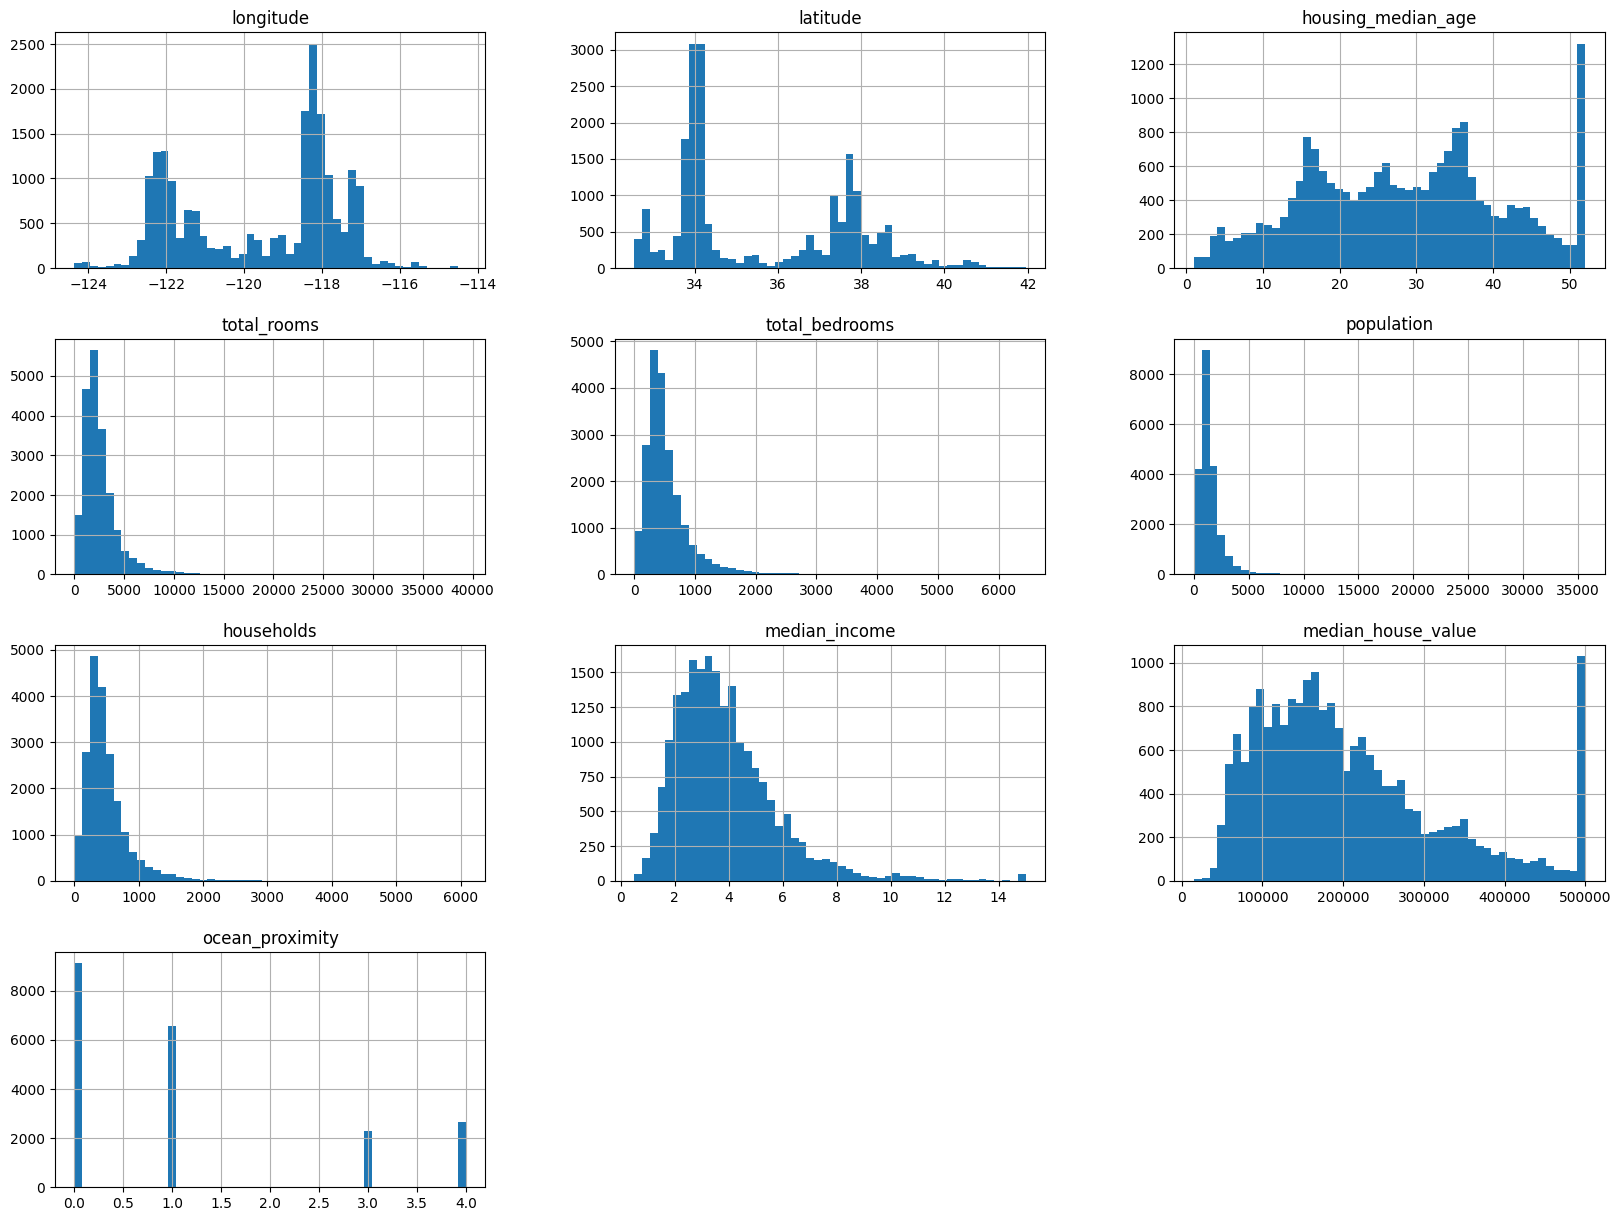

In [389]:
df.hist(bins=50, figsize=(20,15))

In [390]:
col=df.columns.tolist()

In [391]:
c1={'median_house_value', 'ocean_proximity', 'longitude', 'latitude'}
col=[l for l in col if l not in c1]

In [392]:
from scipy import stats
for i in range(len(col)):
  skew_coef = df[col[i]].skew()
  if  skew_coef < -0.05 or skew_coef > 0.05:
    df[col[i]] = stats.boxcox(df[col[i]])[0]
  print(col[i], df[col[i]].skew())

housing_median_age -0.12157379330171006
total_rooms 0.12329365118357485
total_bedrooms 0.11494042128569831
population 0.11308100916054718
households 0.11595277770946943
median_income 0.004876256782666812


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='longitude', ylabel='median_house_value'>,
        <Axes: xlabel='latitude', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='total_bedrooms', ylabel='median_house_value'>,
        <Axes: xlabel='population', ylabel='median_house_value'>,
        <Axes: xlabel='households', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='longitude'>,
        <Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='p

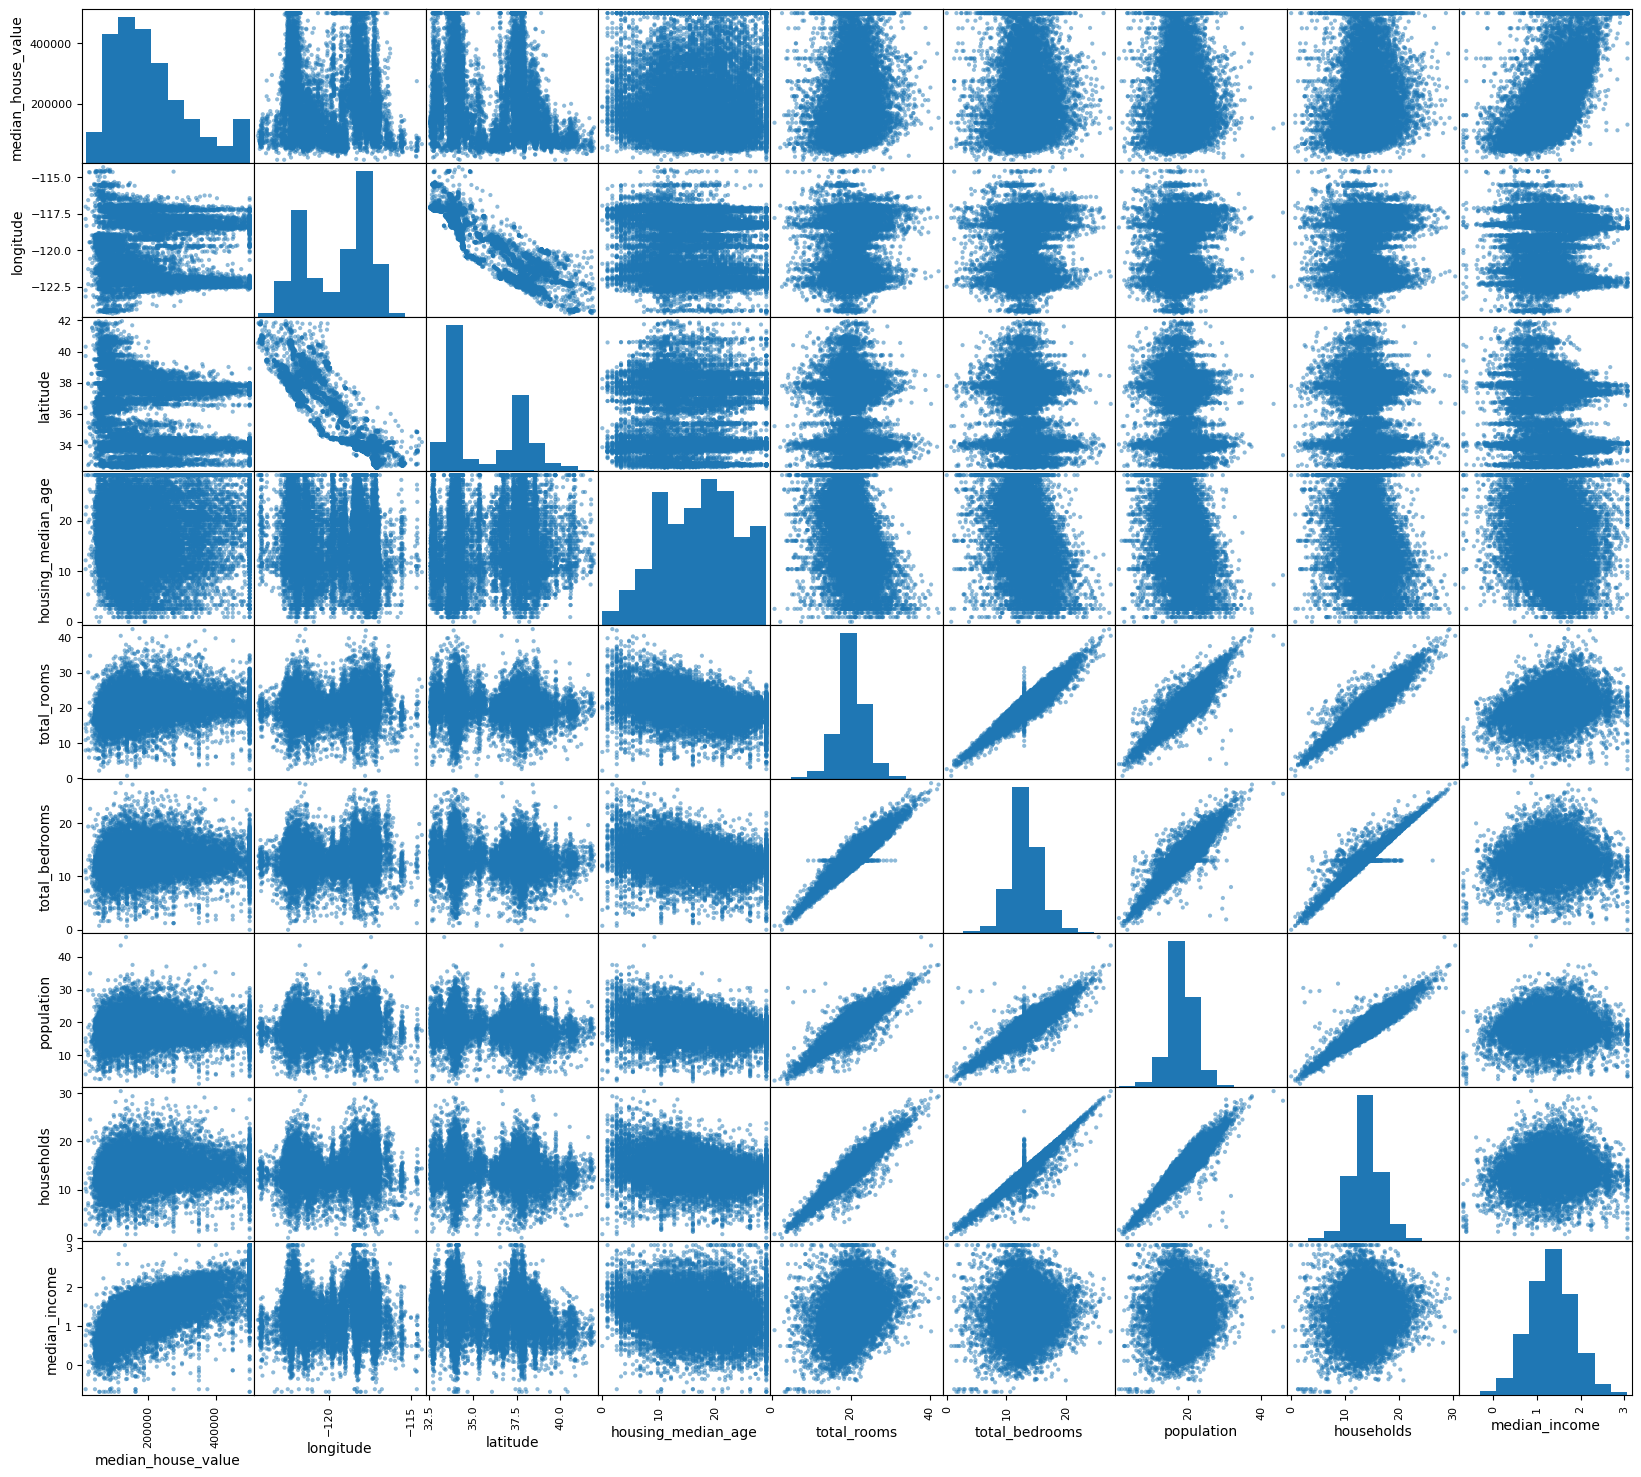

In [393]:
from pandas.plotting import scatter_matrix

columns=['median_house_value','longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
scatter_matrix(df[columns], figsize=(20, 18))

In [399]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.105252,0.033967,0.065475,0.114546,0.058161,-0.015288,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.008489,-0.034096,-0.070690,-0.137726,-0.087530,-0.085441,-0.144160,0.200974
housing_median_age,-0.105252,0.008489,1.000000,-0.352447,-0.302219,-0.276986,-0.277598,-0.141669,0.101593,0.108198
total_rooms,0.033967,-0.034096,-0.352447,1.000000,0.935548,0.859972,0.928205,0.267438,0.165510,-0.012774
total_bedrooms,0.065475,-0.070690,-0.302219,0.935548,1.000000,0.889643,0.972116,0.021136,0.055753,-0.010053
population,0.114546,-0.137726,-0.276986,0.859972,0.889643,1.000000,0.926183,0.035052,-0.025156,-0.081056
households,0.058161,-0.087530,-0.277598,0.928205,0.972116,0.926183,1.000000,0.053170,0.076267,-0.014737
median_income,-0.015288,-0.085441,-0.141669,0.267438,0.021136,0.035052,0.053170,1.000000,0.659298,-0.019187
median_house_value,-0.045967,-0.144160,0.101593,0.165510,0.055753,-0.025156,0.076267,0.659298,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.108198,-0.012774,-0.010053,-0.081056,-0.014737,-0.019187,0.081750,1.000000


In [400]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [401]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [402]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(mse, mae, r2)

5472893231.626171 55381.389123880945 0.5823522791355555


In [403]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)

test_pred=rf.predict(x_test)
r2score=r2_score(y_test, test_pred)

print(r2score)

0.8096251784072642
